In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rand = np.random.RandomState(42)
x = rand.uniform(-5, 5, size=100)
y = (rand.normal(size=len(x)) + (np.sin(4 * x) + x)) / 2

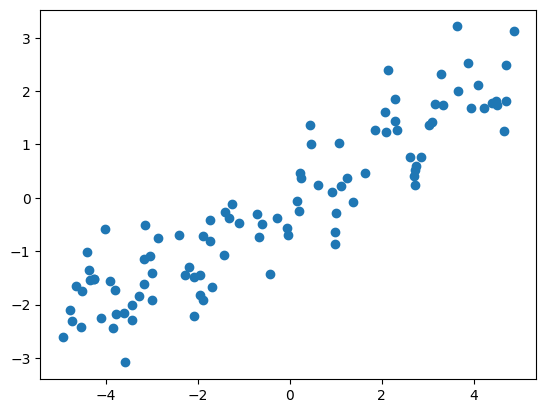

In [3]:
x = x.reshape(-1, 1)
plt.plot(x, y, "o")

In [4]:
x_test = np.linspace(-5, 5, 100, endpoint=False).reshape(-1, 1)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model01 = LinearRegression().fit(x, y)
predict_model01 = model01.predict(x_test)

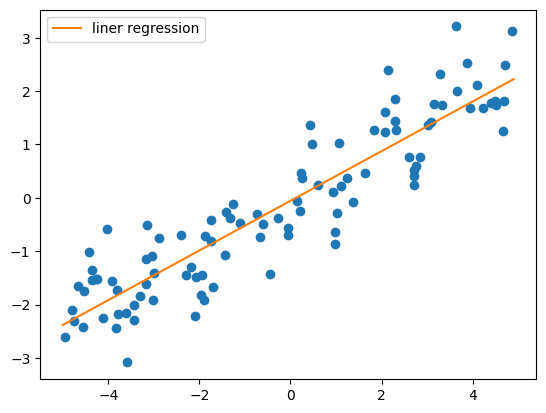

In [7]:
plt.plot(x, y, "o")
plt.plot(x_test, predict_model01, label="liner regression")
plt.legend()

In [8]:
# 데이터를 어떻게 변환 시켜야 더 좋은 결과를 얻을 수 있을까?
# 특성 공학(Feature Engineering) -> 특성 선택/ 특성 추출/ ...

# 데이터를 균일한 간격으로 잘라서 예측해보자.
from sklearn.preprocessing import KBinsDiscretizer

In [9]:
bins = KBinsDiscretizer(n_bins=10, strategy="uniform", encode="onehot-dense").fit(x)
x_binned = bins.transform(x)

In [10]:
model02 = LinearRegression().fit(x_binned, y)
predict_model02 = model02.predict(bins.transform(x_test))

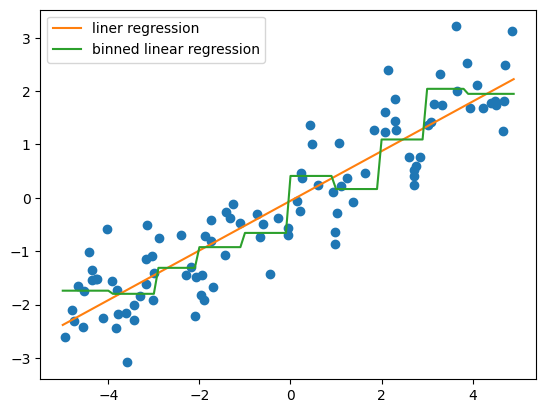

In [18]:
plt.plot(x, y, "o")
plt.plot(x_test, predict_model01, label="liner regression")
plt.plot(x_test, predict_model02, label="binned linear regression")
plt.legend()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 특성의 다항식 추가

In [ ]:
# 10차 다항식 - 값에 근접하기위해 다항식으로 만들어보자 10제곱
poly = PolynomialFeatures(degree=10)
poly.fit(x)
x_poly = poly.transform(x)

In [ ]:
model03 = LinearRegression().fit(x_poly, y)
predict_model03 = model03.predict(poly.transform(x_test))

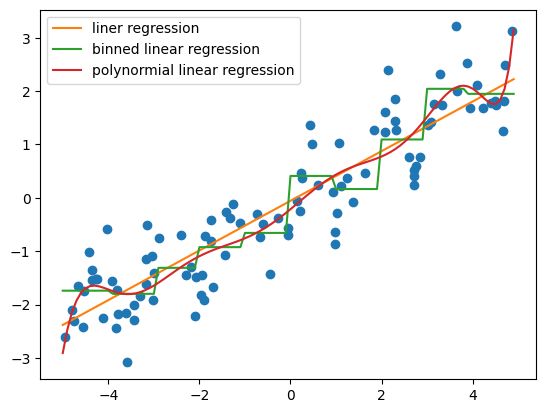

In [17]:
plt.plot(x, y, "o")
plt.plot(x_test, predict_model01, label="liner regression")
plt.plot(x_test, predict_model02, label="binned linear regression")
plt.plot(x_test, predict_model03, label="polynormial linear regression")
plt.legend()

In [19]:
x[0]

array([-1.25459881])

In [ ]:
x_poly[0]

array([ 1.        , -1.25459881,  1.57401818, -1.97476134,  2.47753322,
       -3.10831024,  3.89968233, -4.89253682,  6.13817088, -7.70094189,
        9.66159254])

In [ ]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10'], dtype=object)

In [22]:
import seaborn as sns

In [23]:
tips = sns.load_dataset("tips")

In [24]:
# 1.
x = tips[["total_bill", "size"]]
y = tips[["tip"]]

In [25]:
# 2.
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# 전체 데이터에서 가져온 내용
x_train.shape

(195, 2)

In [28]:
# 3.
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
# 4.
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# coef :  coefficient (희귀 계수 - W)
# intercept : 절퍈 (b)

print(model.coef_)
print(model.intercept_)

[[0.07772997 0.25359632]]
[0.76656186]


In [32]:
# 5. 
model.score(x_test,y_test)

0.5077599375375339

---

In [33]:
# 1.
x = tips[["total_bill", "size"]]
y = tips[["tip"]]

In [34]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

In [35]:
# 2.
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=1)

In [36]:
x_poly[0]

array([1.0000000e+00, 1.6990000e+01, 2.0000000e+00, 2.8866010e+02,
       3.3980000e+01, 4.0000000e+00, 4.9043351e+03, 5.7732020e+02,
       6.7960000e+01, 8.0000000e+00])

In [37]:
poly.get_feature_names_out()

array(['1', 'total_bill', 'size', 'total_bill^2', 'total_bill size',
       'size^2', 'total_bill^3', 'total_bill^2 size', 'total_bill size^2',
       'size^3'], dtype=object)

In [38]:
# 3.
model = LinearRegression()

In [39]:
# 4.
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
print(model.coef_)
print(model.intercept_)

[[ 0.00000000e+00  2.50351916e-01  4.62160125e-01 -1.20536884e-02
   1.03285080e-01 -5.30095710e-01 -5.02588955e-05  4.53020571e-03
  -4.88292371e-02  1.67204866e-01]]
[-0.63193]


In [42]:
model.score(x_test, y_test)

0.3741141866503461